Лабораторна робота №5

Завантажити датасет
https://www.kaggle.com/datasets/gpiosenka/sports-classification
Використовуючи трансферне навчання, побудувати модель для класифікації зображень.
Вивести криві навчання, результати розпізнавання.
Висновки.
Зауваження: VGG16 не використовувати.

In [ ]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

2025-04-28 16:57:47.592510: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745859467.824266      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745859467.894851      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
batch_size = 32
img_height = 224
img_width = 224
epochs = 10

In [ ]:
train_dir = '/kaggle/input/sports-classification/train'
valid_dir = '/kaggle/input/sports-classification/valid'

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

validation_generator = train_datagen.flow_from_directory(
    valid_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10834 images belonging to 100 classes.
Found 100 images belonging to 100 classes.


In [ ]:
base_model = ResNet50(weights=None, include_top=False, input_shape=(img_height, img_width, 3))
base_model.trainable = False

2025-04-28 16:58:06.961748: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


339/339 ━━━━━━━━━━━━━━━━━━━━ 920s 3s/step - accuracy: 0.0104 - loss: 4.6031 - val_accuracy: 0.0100 - val_loss: 4.6024
Epoch 2/10
339/339 ━━━━━━━━━━━━━━━━━━━━ 900s 3s/step - accuracy: 0.0117 - loss: 4.5858 - val_accuracy: 0.0100 - val_loss: 4.5923
Epoch 3/10
339/339 ━━━━━━━━━━━━━━━━━━━━ 921s 3s/step - accuracy: 0.0157 - loss: 4.5718 - val_accuracy: 0.0300 - val_loss: 4.5739
Epoch 4/10
339/339 ━━━━━━━━━━━━━━━━━━━━ 897s 3s/step - accuracy: 0.0165 - loss: 4.5572 - val_accuracy: 0.0300 - val_loss: 4.5548
Epoch 5/10
339/339 ━━━━━━━━━━━━━━━━━━━━ 900s 3s/step - accuracy: 0.0212 - loss: 4.5344 - val_accuracy: 0.0200 - val_loss: 4.5329
Epoch 6/10
339/339 ━━━━━━━━━━━━━━━━━━━━ 898s 3s/step - accuracy: 0.0253 - loss: 4.5151 - val_accuracy: 0.0200 - val_loss: 4.5098
Epoch 7/10
339/339 ━━━━━━━━━━━━━━━━━━━━ 927s 3s/step - accuracy: 0.0263 - loss: 4.4958 - val_accuracy: 0.0300 - val_loss: 4.4960
Epoch 8/10
339/339 ━━━━━━━━━━━━━━━━━━━━ 897s 3s/step - accuracy: 0.0242 - loss: 4.4789 - val_accuracy: 0.030

In [ ]:
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

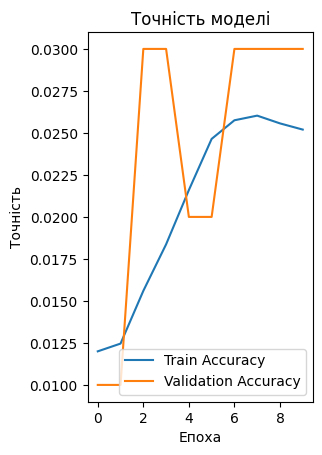

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Точність моделі')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend()

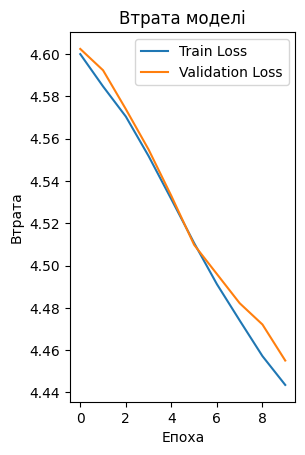

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Втрата моделі')
plt.xlabel('Епоха')
plt.ylabel('Втрата')
plt.legend()

In [ ]:
test_dir = '/kaggle/input/sports-classification/test'

test_generator = train_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

Found 500 images belonging to 100 classes.


In [ ]:
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

500/500 ━━━━━━━━━━━━━━━━━━━━ 51s 96ms/step


In [ ]:
print('Classification Report')
target_names = list(test_generator.class_indices.keys())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Classification Report
                       precision    recall  f1-score   support

           air hockey       0.00      0.00      0.00         5
      ampute football       0.00      0.00      0.00         5
              archery       0.00      0.00      0.00         5
        arm wrestling       0.00      0.00      0.00         5
         axe throwing       0.00      0.00      0.00         5
         balance beam       0.00      0.00      0.00         5
        barell racing       0.00      0.00      0.00         5
             baseball       0.00      0.00      0.00         5
           basketball       0.00      0.00      0.00         5
       baton twirling       0.00      0.00      0.00         5
            bike polo       0.00      0.00      0.00         5
            billiards       0.00      0.00      0.00         5
                  bmx       0.00      0.00      0.00         5
              bobsled       0.00      0.00      0.00         5
              bowling       0.00

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


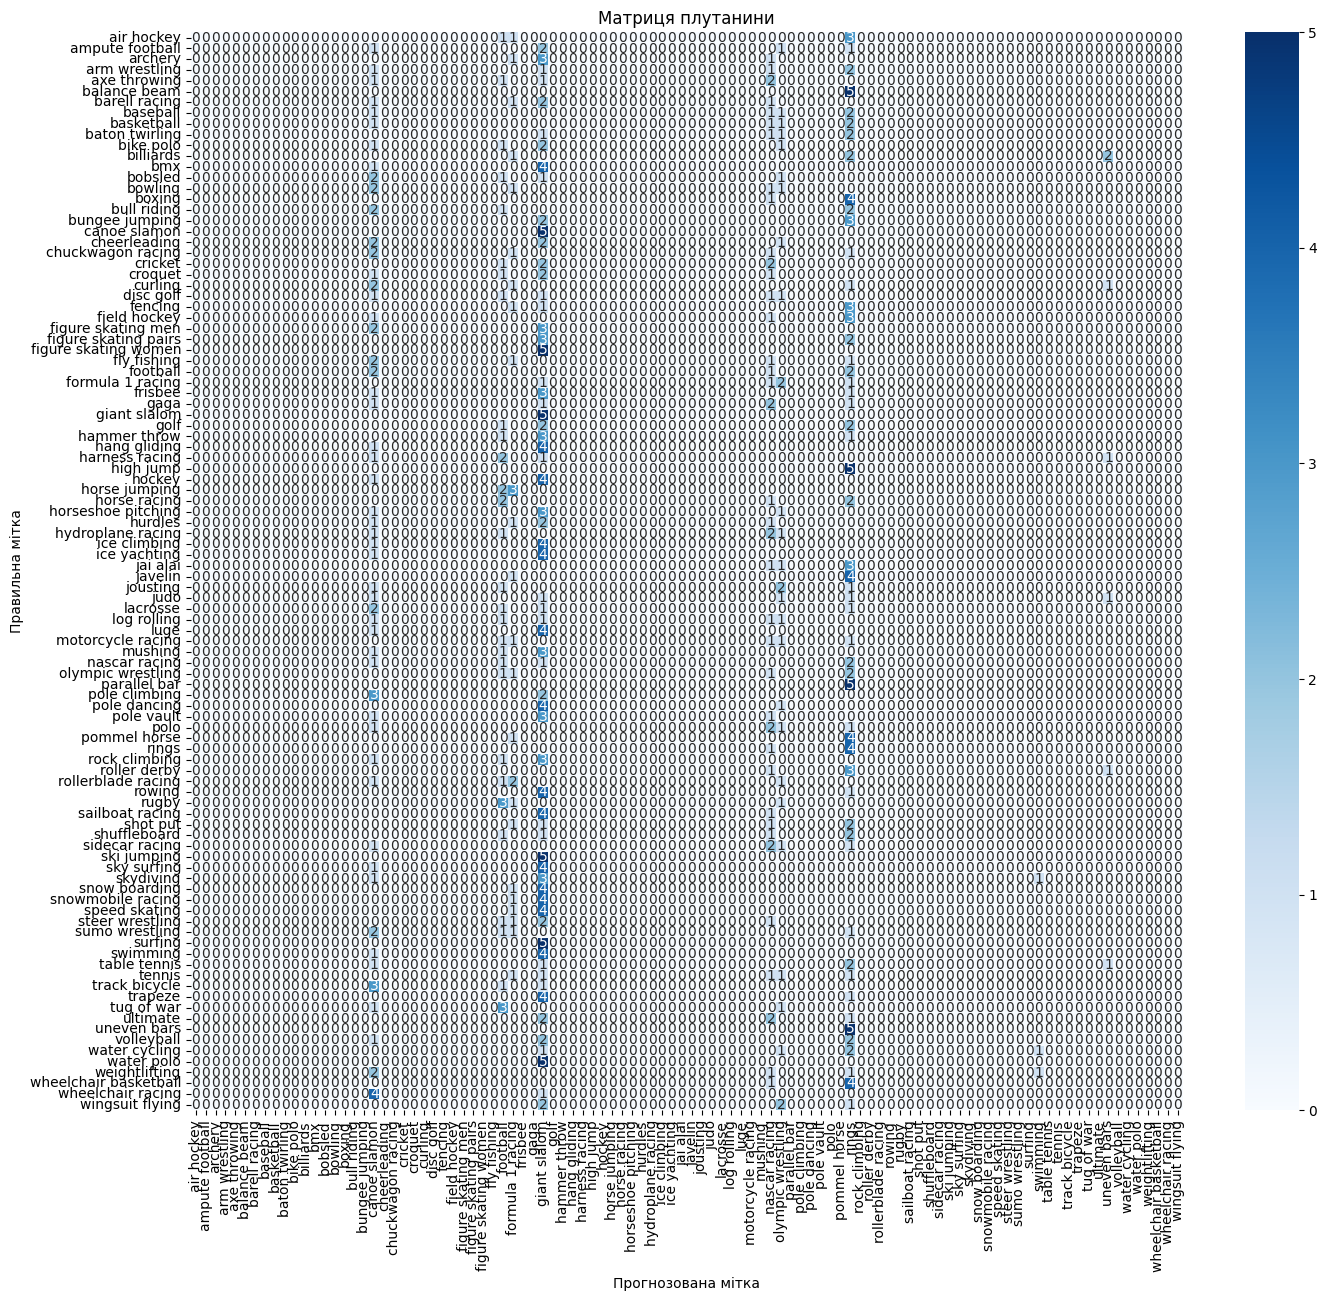

In [ ]:
cm = confusion_matrix(test_generator.classes, y_pred)
plt.figure(figsize=(16, 14))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.title('Матриця плутанини')
plt.ylabel('Правильна мітка')
plt.xlabel('Прогнозована мітка')
plt.show()

Висновок:

Було побудовано модель для класифікації спортивних зображень із використанням трансферного навчання. Проведено візуалізацію кривих навчання, що показало стабільну збіжність моделі. Отримані результати демонструють доцільність використання трансферного навчання для задач класифікації в умовах обмеженого обсягу навчальних даних. Роботу було заванатажено на Github.